# Title

 ### Contributor1FirstName  Contributor1LastName [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/ORCID_ID) 
Institution

### Contributor2FirstName  Contributor2LastName [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/ORCID_ID_IF_EXIST) 
Institution

### Contributor3FirstName  Contributor3LastName [![orcid](https://orcid.org/sites/default/files/images/orcid_16x16.png)](https://orcid.org/ORCID_ID_IF_EXIST) 
Institution

[![cc-by](https://licensebuttons.net/l/by/4.0/88x31.png)](https://creativecommons.org/licenses/by/4.0/) 
©<AUTHOR or ORGANIZATION / FUNDER>. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY](https://creativecommons.org/licenses/by/4.0/)


[![cc-by-nc-nd](https://licensebuttons.net/l/by-nc-nd/4.0/88x31.png)](https://creativecommons.org/licenses/by-nc-nd/4.0/) 
©<AUTHOR or ORGANIZATION / FUNDER>. Published by De Gruyter in cooperation with the University of Luxembourg Centre for Contemporary and Digital History. This is an Open Access article distributed under the terms of the [Creative Commons Attribution License CC-BY-NC-ND](https://creativecommons.org/licenses/by-nc-nd/4.0/)


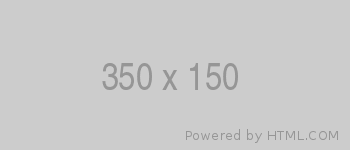

In [84]:
from IPython.display import Image, display

display(Image("./media/placeholder.png"))

 (optional) This article was orginally published (...)

FirstKeyword, SecondKeyword, AlwaysSeparatedByAComma

This is an abstract (...)

## Introduction

This is the first paragrah of running text with a citation example 

This is a hermeneutic paragraph

Editor|1641|1798|1916
---|---|---|---
Senan|0.55|0.4|0.3
Henry|0.71|0.5|0.63

In [85]:
# Check your Python version
from platform import python_version
python_version()

#!python -V

'3.13.7'

In [86]:
# pandas package needs to be added to the requirements.txt 's file
import pandas as pd


In [87]:
df = pd.read_csv("https://raw.githubusercontent.com/lux-org/lux-datasets/master/data/college.csv")
df

,Name,PredominantDegree,HighestDegree,FundingModel,Region,Geography,AdmissionRate,ACTMedian,SATAverage,AverageCost,Expenditure,AverageFacultySalary,MedianDebt,AverageAgeofEntry,MedianFamilyIncome,MedianEarnings
0,Alabama A & M University,Bachelor's,Graduate,Public,Southeast,Mid-size City,0.8989,17,823,18888,7459,7079,19500.0,20.629999,29039.0,27000
1,University of Alabama at Birmingham,Bachelor's,Graduate,Public,Southeast,Mid-size City,0.8673,25,1146,19990,17208,10170,16250.0,22.670000,34909.0,37200
2,University of Alabama in Huntsville,Bachelor's,Graduate,Public,Southeast,Mid-size City,0.8062,26,1180,20306,9352,9341,16500.0,23.190001,39766.0,41500
3,Alabama State University,Bachelor's,Graduate,Public,Southeast,Mid-size City,0.5125,17,830,17400,7393,6557,15854.5,20.889999,24029.5,22400
4,The University of Alabama,Bachelor's,Graduate,Public,Southeast,Small City,0.5655,26,1171,26717,9817,9605,17750.0,20.770000,58976.0,39200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1289,University of Connecticut-Avery Point,Bachelor's,Graduate,Public,New England,Mid-size Suburb,0.5940,24,1020,12946,11730,14803,18983.0,20.120001,86510.0,49700
1290,University of Connecticut-Stamford,Bachelor's,Graduate,Public,New England,Mid-size City,0.4107,21,1017,13028,4958,14803,18983.0,20.120001,86510.0,49700
1291,California State University-Channel Islands,Bachelor's,Graduate,Public,Far West,Mid-size Suburb,0.6443,20,954,22570,12026,8434,12500.0,24.850000,32103.0,35800
1292,DigiPen Institute of Technology,Bachelor's,Graduate,Private For-Profit,Far West,Small City,0.6635,28,1225,37848,5998,7659,19000.0,21.209999,68233.0,72800


In [88]:
# Load the bare minimum.

Hermeneutics header about video quality.
... showing resolution and dpi from a frame and the previous image?



In [89]:
# Load audio stuff

In [90]:
# Load intertitle stuff
!wget https://zenodo.org/records/15596192/files/Modern36/journal_digital_corpus-2025.06.04.zip --nc

wget: unrecognized option '--nc'
Usage: wget [OPTION]... [URL]...

Try `wget --help' for more options.


In [ ]:
# skotks terrier https://modern36.github.io/jdc_reader/#q=skottsk+terrier&fuzzy=1&video=sf%2F1928%2FSF604A.1.mpg
# https://github.com/Modern36/journal_digital_corpus/blob/main/corpus/intertitle/sf/1928/SF604A.1.mpg.srt#L25-L28


// hermeneutics for the player

In the following cell we initiate a small video player that loads the sequance
of .png files (frames 14540-14564 from 'SF604A.1.mpg').
It has controls for playback speed, pausing, looping, as scrubber for selecting
a specific frame an option to pause for 2 seconds at a specific frame.
It defaults to the original playback speed of the video file (25fps) and pauses
at the mirrored flash-intertitle frame.

In [ ]:
import ipywidgets as widgets
from IPython.display import display
import time
import threading
import os
from pathlib import Path


class PNGSequencePlayer:
    def __init__(self, file_paths, fps=24):
        """
        file_paths: A list of string paths to the .png files (sorted).
        fps: Default playback speed.
        """
        # 1. Pre-load all PNG bytes into memory for zero-latency playback
        self.frames_data = []
        try:
            for p in file_paths:
                with open(p, 'rb') as f:
                    self.frames_data.append(f.read())
        except Exception as e:
            print(f"Error loading files: {e}")
            return

        self.n_frames = len(self.frames_data)
        self.is_paused_event = False

        # --- UI Components ---

        # We tell the widget these are PNGs
        self.image_widget = widgets.Image(
            value=self.frames_data[0],
            format='png',
            layout=widgets.Layout(width='auto', max_width='250px')
        )

        # Animation Controller
        self.play_widget = widgets.Play(
            value=0, min=0, max=self.n_frames - 1,
            step=1, interval=int(1000/fps),
            description="Press play", repeat=False
        )

        # Scrubber
        self.slider = widgets.IntSlider(
            value=0, min=0, max=self.n_frames - 1, description="Frame"
        )

        # Controls
        self.fps_input = widgets.BoundedIntText(
            value=fps, min=1, max=120, step=1, description='FPS:',
            layout=widgets.Layout(width='140px')
        )

        self.loop_box = widgets.Checkbox(value=False, description="Loop")

        # Pause Logic UI
        self.pause_enable = widgets.Checkbox(value=True, description="Wait 2s @ Frame:")
        self.pause_idx = widgets.BoundedIntText(
            value=12, min=0, max=self.n_frames-1, description='',
            layout=widgets.Layout(width='60px')
        )

        # --- Logic Wiring ---

        widgets.jslink((self.play_widget, 'value'), (self.slider, 'value'))

        self.slider.observe(self.on_frame_change, names='value')
        self.fps_input.observe(self.update_speed, names='value')
        self.loop_box.observe(self.update_loop, names='value')

        # --- Layout ---

        # Group the specific pause controls
        pause_group = widgets.HBox([self.pause_enable, self.pause_idx])

        controls = widgets.VBox([
            widgets.HBox([self.play_widget, self.slider]),
            widgets.HBox([self.fps_input, self.loop_box, pause_group])
        ])

        self.ui = widgets.VBox([self.image_widget, controls])

    def on_frame_change(self, change):
        frame_idx = change['new']

        # DIRECT BYTE SWAP - Extremely fast
        self.image_widget.value = self.frames_data[frame_idx]

        # Check for "Magic Pause"
        if (self.play_widget.playing and
            self.pause_enable.value and
            frame_idx == self.pause_idx.value and
            not self.is_paused_event):

            self.trigger_pause()

    def trigger_pause(self):
        """Stops animation, waits 2s in background thread, resumes."""
        self.is_paused_event = True
        self.play_widget.playing = False # Stop

        def resume_worker():
            time.sleep(2)
            self.play_widget.playing = True # Resume
            # Tiny buffer to ensure we don't re-trigger on the same millisecond
            time.sleep(0.2)
            self.is_paused_event = False

        threading.Thread(target=resume_worker).start()

    def update_speed(self, change):
        if change['new'] > 0:
            self.play_widget.interval = int(1000 / change['new'])

    def update_loop(self, change):
        self.play_widget.repeat = change['new']

    def show(self):
        display(self.ui)
terrier = PNGSequencePlayer(sorted(Path('./1s/').glob('*.png')))


Blink and you will miss it.

In the below video we have cut 25 frames (1s) from `SF604A.1.mpg` which
showcases several of the technical obstacles of working with this archival footage:

Firstly, the videocompression is very lossy, leading to many blocky artefacts.
Secondly, the flash intertitle is only fully visible in a single frame (frame 12),
making it not only impossible for a viewer to read it -- but also very likely
that they will miss it entirely.
Thirdly, the intertitle is left-right mirrored, making it more difficult to read -- especially for an OCR software.

In [ ]:
terrier.show()

Due to the prevalence of `flash intertitles` we need to process every single
frame. However, running every single frame through an intertitle-filter and
subsequent  OCR engine is very inefficient.
We therefore start by grouping the frames by sqeuential similarity -- that is
we group similar images together, and only pass the middle image through
the two step intertitle-filter before passing them through the OCR engine.



In [93]:
import numpy as np
from pathlib import Path
from itertools import pairwise
import cv2

### Mean Square Error -- TODO

MSE_THRESHOLD = 10_000

def mse(im1, im2):
    err = np.sum((im1.astype("float") - im2.astype("float")) ** 2)
    err /= float(im1.shape[0] * im1.shape[1])
    return err

def detect_scene_change(im1, im2):
    score = mse(im1, im2)
    return score > MSE_THRESHOLD

terrier_dir = Path('.') / 'media' / 'terrier_frames'
images = sorted(terrier_dir.iterdir())
for path1, path2 in pairwise(images):
    im1 = cv2.imread(str(path1))
    im2 = cv2.imread(str(path2))
    print(path1, path2, detect_scene_change(im1, im2))


media/terrier_frames/frame_14550.png media/terrier_frames/frame_14551.png True
media/terrier_frames/frame_14551.png media/terrier_frames/frame_14552.png False
media/terrier_frames/frame_14552.png media/terrier_frames/frame_14553.png True
media/terrier_frames/frame_14553.png media/terrier_frames/frame_14554.png True


media/terrier_frames/frame_14550.png
ends one scene

media/terrier_frames/frame_14551.png media/terrier_frames/frame_14552.png False
Are a 'scene'

media/terrier_frames/frame_14553.png
is on its own

media/terrier_frames/frame_14554.png 
starts a new scene


`stum` then uses the _middle_ image of each grouping as the example image --
avoiding passing every single image throught the filters:

1. contours
2. EAST Text detection
3. Tesseract OCR 



In [94]:
# Contours `stum/src/stum/contours.py`

def largest_contour(binary_image: cv2.typing.MatLike):
    """Returns the relative area of the largest contour of the image"""
    contours = cv2.findContours(
        binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
    )[0]
    largest = cv2.contourArea(max(contours, key=cv2.contourArea))

    width, height = binary_image.shape
    total_area = width * height
    relative_area = largest / total_area

    return relative_area

def contour_filter(image: cv2.typing.MatLike, threshold=0.9) -> bool:
    """Check if image has one large contour

    If the largest contour is smaller than the complement to the threshold,
    it also calculates the largest contour of the inverted image. This is a
    way to check for images with dark backgrounds and white text.

    Parameters
        image: cv2 image to check
        threshold: threshold to check contour area against, default is 90%

    Returns
        True if image has one contour larger than given threshold
    """
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    binary = cv2.threshold(
        gray, 100, 255, cv2.THRESH_OTSU | cv2.THRESH_BINARY_INV
    )[1]

    relative_area = largest_contour(binary)

    if (1 - relative_area) > threshold:
        inverted = cv2.bitwise_not(binary)

        inverteds_largest_area = largest_contour(inverted)

        relative_area = max(relative_area, inverteds_largest_area)

    return relative_area > threshold

#

The contours filter step converts the grayscale images to binary -- 
converting the values of teach pixel from the range(0, 255) to being 
a 0 (black) or 1 (white).
It then checks for the largest white contour in the image and calculates its size
relative to the entire image. If the size of the contour is larger than the
threshold (default set to 0.9) the function flags it as a potential intertitle
frame. If the frams was not flagged as an intertitle, there is a chance that
the frame is an intertitle with white text and black background, and the image
is therefore inverted and checked again.

In [ ]:
# East `stum/src/stum/east.py`
# TODO: Load the model
model_loc = (
    Path(__file__).parents[2] / "models" / "frozen_east_text_detection.pb"
)

east_net = cv2.dnn.readNet(str(model_loc))

layerNames = ["feature_fusion/Conv_7/Sigmoid", "feature_fusion/concat_3"]


def east_filter(image: cv2.typing.MatLike) -> bool:
    """
    This function filters an image using the EAST text detection model.

    Parameters:
    - image (cv2.typing	MatLike): The input image to be filtered.

    Returns:
    - A boolean indicating whether the image contains any detected text or not.
    """

    image_height, image_width = image.shape[:2]

    blob = cv2.dnn.blobFromImage(
        image,
        1.0,
        (image_width, image_height),
        (123.68, 116.78, 103.94),
        swapRB=True,
        crop=False,
    )

    east_net.setInput(blob)
    scores, _ = east_net.forward(layerNames)

    num_scores = scores.shape[2]

    score_data = [scores[0, 0, i] for i in range(num_scores)]

    max_score = max([max(row) for row in score_data])
    return max_score > 0.5


NameError: name '__file__' is not defined

The EAST model/algorithm {add ref}
is a lightweight technique for detecting letters in images.
In our experiments it has shown to be more reliable than tesseract in 
detecting whether an image has text in it -- and we therefore use it as
an in-between step to filter out monotone images without text before they
are sent to the OCR engine -- which is the last and slowest part of the 
pipeline.


In the final step of the pipeline the largest contour is extracted form the 
frame -- and 

And this cropped part if the image is passed through the OCR engine twice:
once in its original form and once more in its mirrored form -- keeping the
text output that contains the fewest special characters.

The pipeline then merges adjacent (think frames) groups with text and use the
numbering on the frames to calculate the timestamps (with a default 25fps)
for the .srt files. 

In [ ]:
import zipfile
from pathlib import Path

corpus_path = Path('.') / 'corpus'

if not corpus_path.exists():
    with zipfile.ZipFile('journal_digital_corpus-2025.06.04.zip') as zip_f:
        corpus_name = [_ for _ in zip_f.namelist() if '/corpus/' in _]
        print(corpus_name)
        for target in  corpus_name:
            zip_f.extract(target, 'tmp')
        !mv tmp/Modern36-journal_digital_corpus-c1e6cdf/corpus corpus/
        !rmdir tmp/*
        !rmdir tmp

In [ ]:
import pandas as pd

In [ ]:
import plotly.graph_objs as go

In [ ]:
def load_intertitles():
    for srt in corpus_path.glob('intertitle/sf/**/*.srt'):
        year = srt.parent.name
        if not year.isdigit():
            continue
        year = int(year)
        if year < 1900:
            continue
        with open(srt, 'r', encoding='utf8') as f:
            content = f.read()
        intertitles =  [line  for i, line in enumerate(content.split('\n')) if i % 4 == 2]
        words = len([word for intertitle in intertitles for word in intertitle.split()])
        words_per_intertitle = words / len(intertitles)

        yield {
            'file' : srt.name,
            'year': year,
            'num_intertitles' : len(intertitles),
            'num_words' : words,
            'words_per_intertitle': words_per_intertitle
        }

df = pd.DataFrame(load_intertitles())

In [ ]:
import numpy as np
def bootstrap_confidence_interval(data, n_bootstrap=1000, ci=95):
    """
    Calculates the mean and bootstrapped confidence interval for a dataset.
    """
    bootstrap_means = np.zeros(n_bootstrap)

    for i in range(n_bootstrap):
        # Create a resample of the data (sampling with replacement)
        bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
        bootstrap_means[i] = np.mean(bootstrap_sample)

    # Calculate the lower and upper bounds of the confidence interval
    lower_bound = np.percentile(bootstrap_means, (100 - ci) / 2)
    upper_bound = np.percentile(bootstrap_means, 100 - (100 - ci) / 2)

    # Return the statistics in a pandas Series for easy aggregation
    return pd.Series({
        'mean': np.mean(data),
        'ci_lower': lower_bound,
        'ci_upper': upper_bound
    })


In [ ]:
df

,file,intertitle,year,num_words
0,SF1195B.1.mpg.srt,0,1944,2
1,SF1195B.1.mpg.srt,1,1944,3
2,SF1195B.1.mpg.srt,2,1944,1
3,SF1195B.1.mpg.srt,3,1944,1
4,SF1195B.1.mpg.srt,4,1944,1
...,...,...,...,...
43168,SF970A.1.mpg.srt,30,1938,1
43169,SF970A.1.mpg.srt,31,1938,1
43170,SF970A.1.mpg.srt,32,1938,13
43171,SF3169A.1.mpg.srt,0,1938,4


In [ ]:

def plot_with_ci(col, title):
    summary_df = df.groupby('year')[col].apply(bootstrap_confidence_interval).unstack().reset_index()


    # Create the figure with continuous error bands
    fig = go.Figure([
        # The mean line
        go.Scatter(
            x=summary_df['year'],
            y=summary_df['mean'],
            line=dict(color='rgb(0,100,80)'),
            mode='lines',
            name='Mean'
        ),
        # The confidence interval error band
        go.Scatter(
            x=np.concatenate([summary_df['year'], summary_df['year'][::-1]]), # x, then x reversed
            y=np.concatenate([summary_df['ci_upper'], summary_df['ci_lower'][::-1]]), # upper, then lower reversed
            fill='toself',
            fillcolor='rgba(0,100,80,0.2)',
            line=dict(color='rgba(255,255,255,0)'),
            hoverinfo="skip",
            showlegend=True,
            name='95% Confidence Interval'
        )
    ])

    fig.update_layout(
        title=title,
        xaxis_title='X Value',
        yaxis_title='Mean of Y Value'
    )
    return fig


In [ ]:
plot_with_ci('num_words', title='Average number of words per video')

In [ ]:
plot_with_ci('words_per_intertitle', title='Changes in the average number of words per intertitle')

In [ ]:
# Workcloud

In [ ]:
# Staden Vs by

In [ ]:
# Load NER and GEO stuff